In [1]:
import pandas as pd

file_path = r"parkinsons_updrs.data"
df = pd.read_csv(file_path)
print(df.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

📊 Dataset shape: (5875, 22)

📋 Column names:
 ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

🔍 First few rows:
   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2   

c:\Users\nesri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


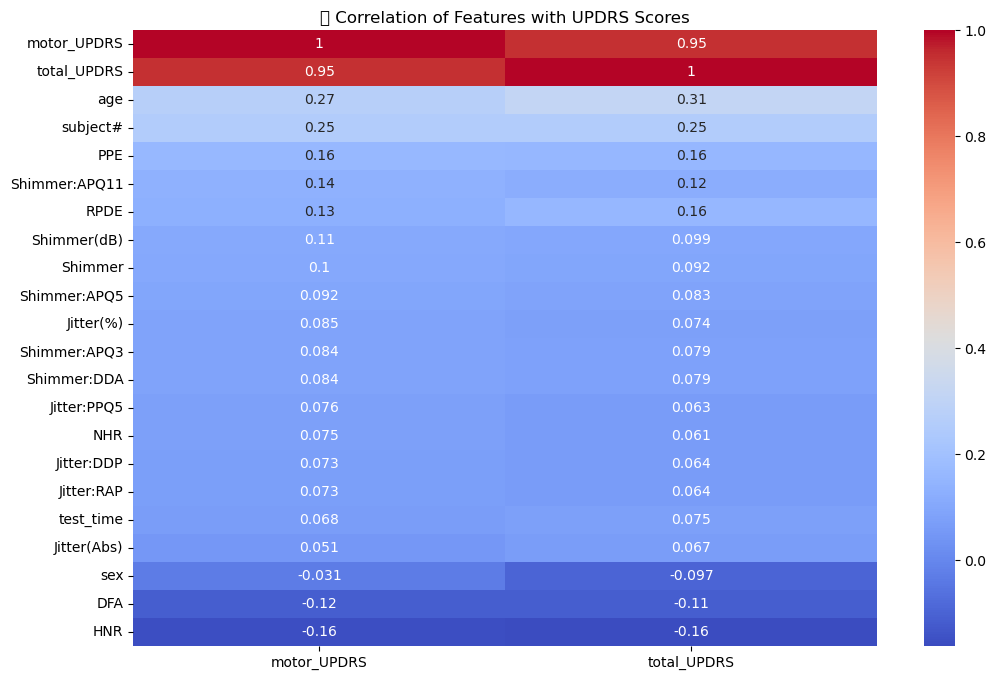

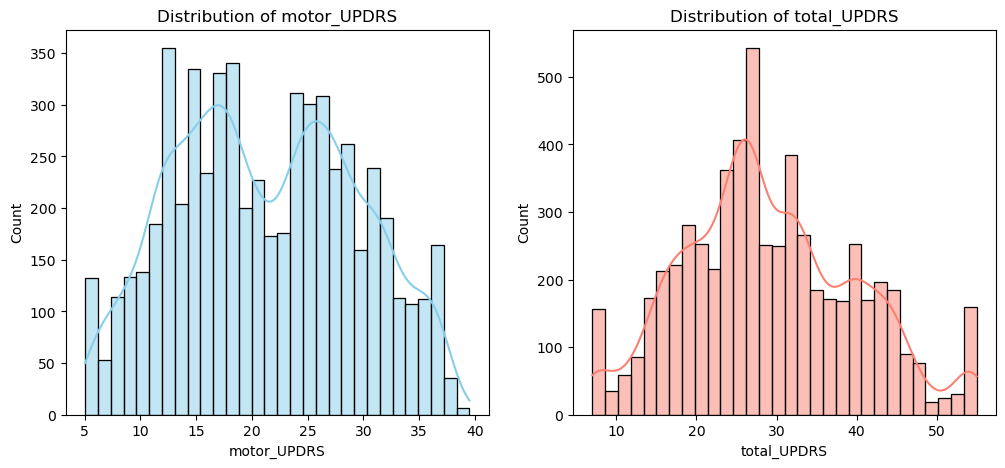

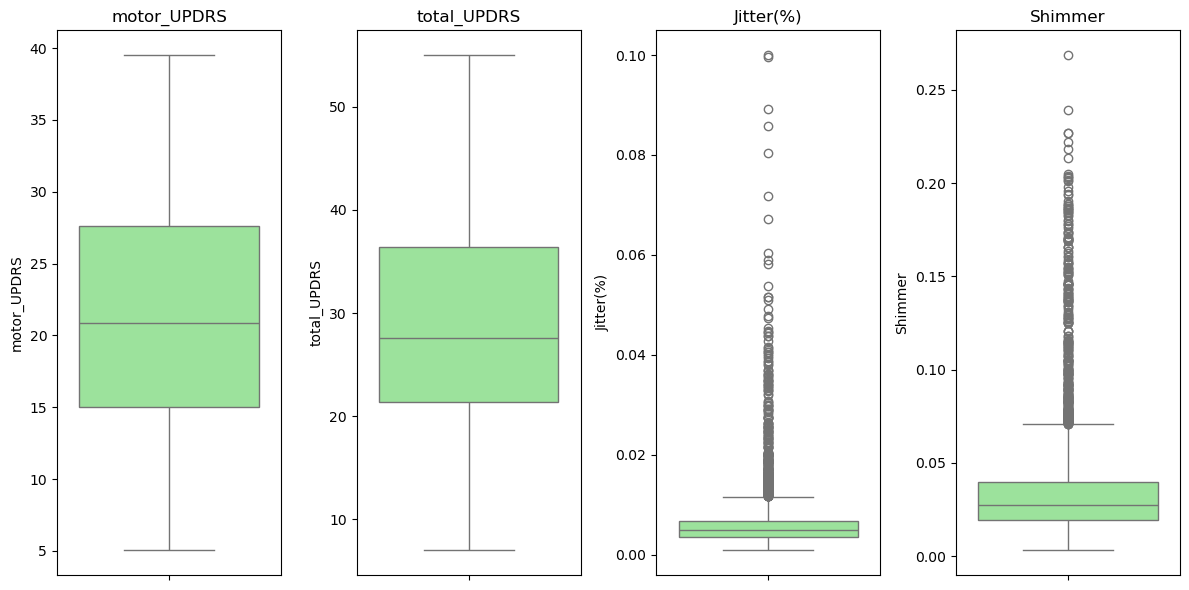

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\nesri\OneDrive\Desktop\regression\parkinsons_updrs.data"
df = pd.read_csv(file_path)

# Basic Info
print("📊 Dataset shape:", df.shape)
print("\n📋 Column names:\n", df.columns.tolist())
print("\n🔍 First few rows:")
print(df.head())

# Check for missing values
print("\n❓ Missing values per column:\n", df.isnull().sum())

# Statistical summary
print("\n📈 Statistical Summary:")
print(df.describe())

# Correlation heatmap with motor_UPDRS and total_UPDRS
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[['motor_UPDRS', 'total_UPDRS']].sort_values(by='motor_UPDRS', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("🔗 Correlation of Features with UPDRS Scores")
plt.show()

# Histograms of key target variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['motor_UPDRS'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of motor_UPDRS')

plt.subplot(1, 2, 2)
sns.histplot(df['total_UPDRS'], bins=30, kde=True, color='salmon')
plt.title('Distribution of total_UPDRS')
plt.show()

# Optional: Check outliers using boxplots for selected features
features_to_check = ['motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Shimmer']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_check):
    plt.subplot(1, len(features_to_check), i + 1)
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(feature)
plt.tight_layout()
plt.show()


so first let's check for the missing values : 

In [3]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display only columns with missing values (if any)
missing = missing_values[missing_values > 0]

if missing.empty:
    print(" No missing values found in the dataset.")
else:
    print(" Missing values found:\n")
    print(missing)

 No missing values found in the dataset.


so now we will see the coorelation with the target to see which features we can drop : 

In [4]:
correlation_matrix = df.corr()

# # Correlation with the target variables
# print("📊 Correlation with motor_UPDRS:\n")
# print(correlation_matrix["motor_UPDRS"].sort_values(ascending=False))


In [5]:
print("\n📊 Correlation with total_UPDRS:\n")
print(correlation_matrix["total_UPDRS"].sort_values(ascending=False))


📊 Correlation with total_UPDRS:

total_UPDRS      1.000000
motor_UPDRS      0.947231
age              0.310290
subject#         0.253643
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
Shimmer(dB)      0.098790
Shimmer          0.092141
Shimmer:APQ5     0.083467
Shimmer:DDA      0.079363
Shimmer:APQ3     0.079363
test_time        0.075263
Jitter(%)        0.074247
Jitter(Abs)      0.066927
Jitter:DDP       0.064027
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
NHR              0.060952
sex             -0.096559
DFA             -0.113475
HNR             -0.162117
Name: total_UPDRS, dtype: float64


now we split the data in to train test and validation sets : 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Step 1: Drop target columns and optionally low-correlation features
X = df.drop(columns=['motor_UPDRS', 'total_UPDRS']) 
y = df['total_UPDRS']

# Step 2: Standardize the features (temporarily to maintain flow)
scaler_temp = StandardScaler()
X_scaled = scaler_temp.fit_transform(X)

# Convert X_scaled back to a DataFrame with the same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 3: First split: 80% train_val + 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42)

# Step 4: Second split: 75% train + 25% val from the 80% remaining
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 5: Fit scaler only on the training set (from original scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 6: Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Check shapes (optional)
print("Train set size:", X_train_scaled.shape)
print("Validation set size:", X_val_scaled.shape)
print("Test set size:", X_test_scaled.shape)


Train set size: (3525, 20)
Validation set size: (1175, 20)
Test set size: (1175, 20)


In [18]:
print(X_train.columns)


Index(['subject#', 'age', 'sex', 'test_time', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


In [21]:
# Let's say you want the unique values of the 'sex' column
unique_values = X_train_scaled['HNR'].unique()

# Print the unique values
print(unique_values)


[ 1.18050827 -1.35568438  0.30550566 ... -0.10881142  0.55764852
 -1.05947996]


In [10]:
# # You can select a subset of features that are most relevant for your target
# sns.pairplot(df[['age', 'RPDE', 'PPE', 'Shimmer:APQ11', 'total_UPDRS']], hue='total_UPDRS', palette='coolwarm')
# plt.show()


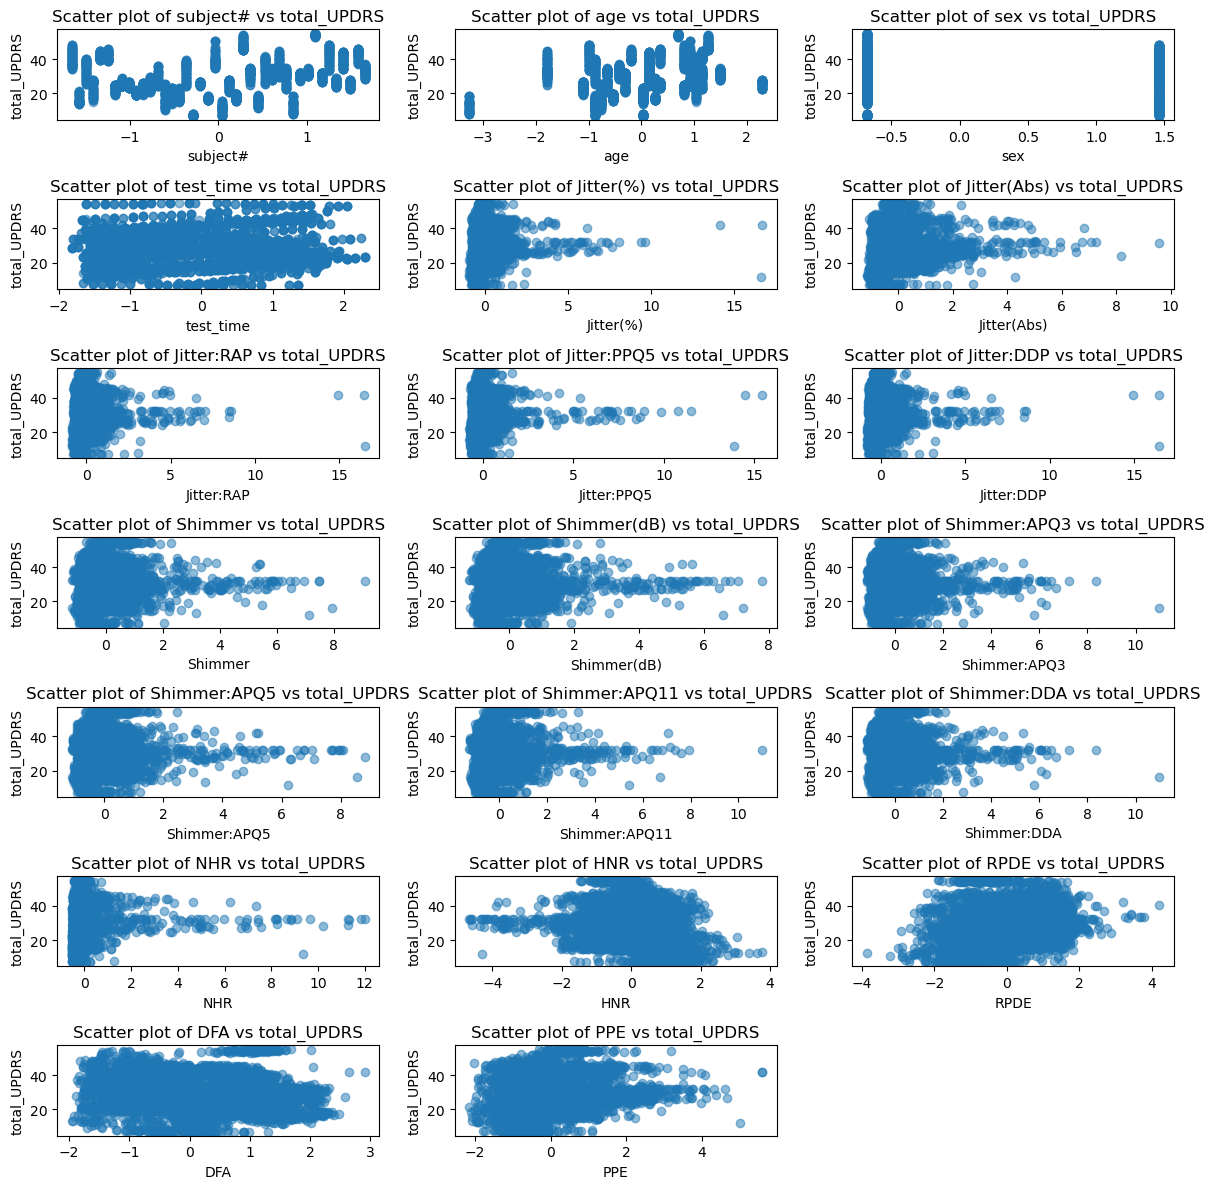

In [12]:
import matplotlib.pyplot as plt

# List of feature columns (excluding the target variable)
features = X_train.columns  # Use the feature columns from the training data

# Plotting scatter plots for all features vs total_UPDRS
plt.figure(figsize=(12, 12))
n_features = len(features)

# Loop through each feature and plot
for i, feature in enumerate(features):
    plt.subplot(n_features // 3 + 1, 3, i + 1)  # Adjust subplot grid size
    plt.scatter(X_train[feature], y_train, alpha=0.5)
    plt.title(f"Scatter plot of {feature} vs total_UPDRS")
    plt.xlabel(feature)
    plt.ylabel("total_UPDRS")

plt.tight_layout()
plt.show()


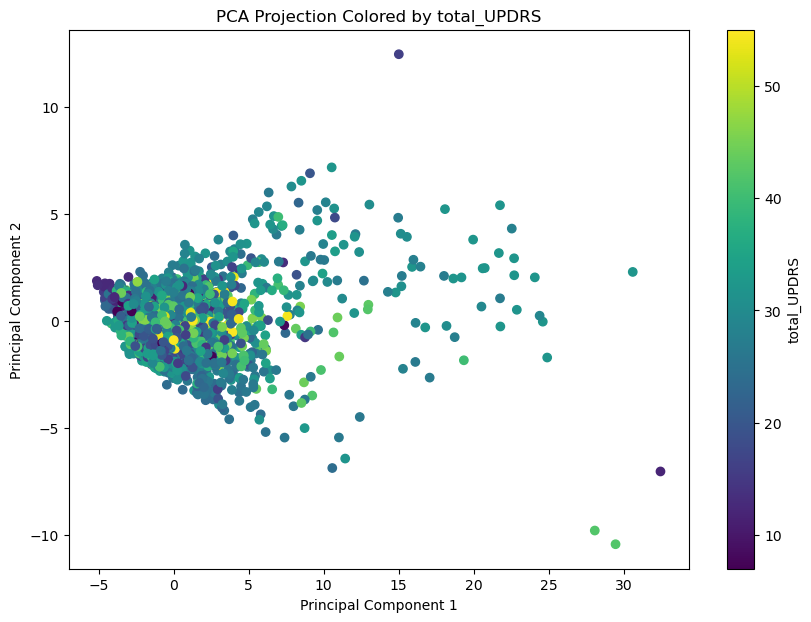

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Create scatter plot with colorbar
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection Colored by total_UPDRS')
cbar = plt.colorbar(scatter)
cbar.set_label('total_UPDRS')
plt.show()


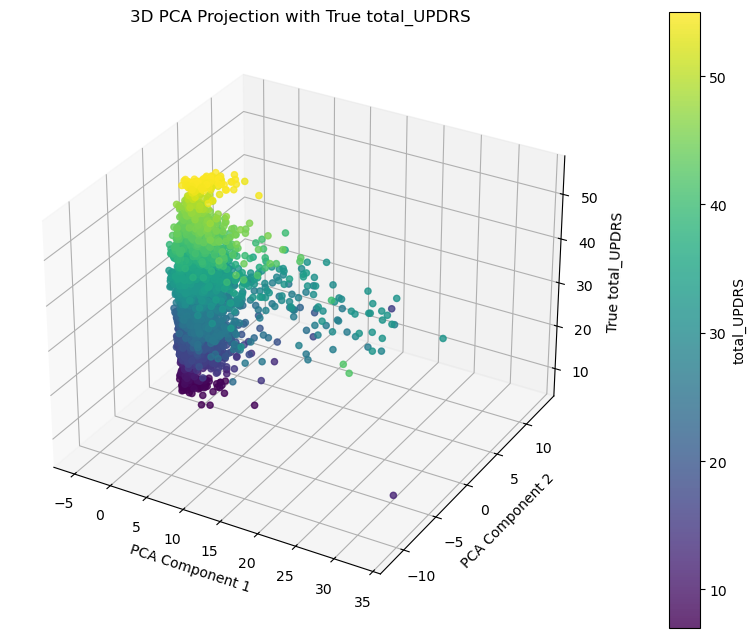

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D plotting)

# Apply PCA to reduce features to 2D (on scaled data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)  # X_train_scaled is your scaled training data

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter: X=PCA1, Y=PCA2, Z=target
scatter = ax.scatter(
    X_pca[:, 0],     # PCA component 1
    X_pca[:, 1],     # PCA component 2
    y_train,         # true target: total_UPDRS
    c=y_train,       # coloring by target value
    cmap='viridis',
    alpha=0.8
)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('True total_UPDRS')
ax.set_title('3D PCA Projection with True total_UPDRS')

# Add colorbar
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('total_UPDRS')

plt.show()


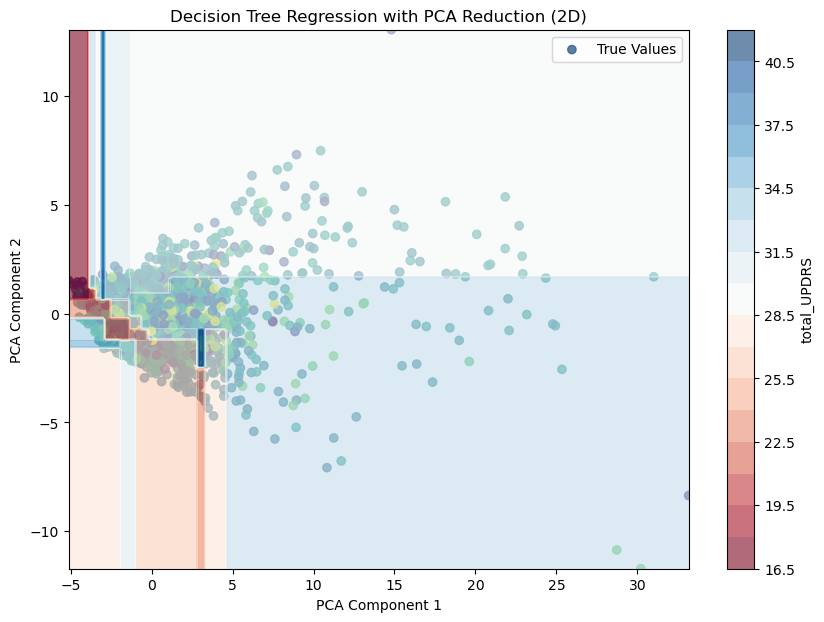

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

# Step 1: Apply PCA (if not already done)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 2: Fit Decision Tree Regressor on PCA-reduced data
dt = DecisionTreeRegressor(max_depth=5, random_state=42)  # You can tweak max_depth for more/less complexity
dt.fit(X_train_pca, y_train)

# Step 3: Create meshgrid for contour plot
x_range = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 200)
y_range = np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 200)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
X_grid = np.c_[x_mesh.ravel(), y_mesh.ravel()]

# Step 4: Predict on grid to create regression surface
z_pred = dt.predict(X_grid).reshape(x_mesh.shape)

# Step 5: Plot the data and prediction surface
plt.figure(figsize=(10, 7))

# Scatter plot for true data points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='True Values', alpha=0.8)

# Contour plot for regression surface
plt.contourf(x_mesh, y_mesh, z_pred, 20, cmap='RdBu', alpha=0.6)

# Labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Tree Regression with PCA Reduction (2D)')
plt.colorbar(label='total_UPDRS')  # Color bar for the predictions
plt.legend()
plt.show()


In [41]:
from sklearn.metrics import r2_score

# Step 1: Transform test data using the same PCA
X_test_pca = pca.transform(X_test_scaled)

# Step 2: Predict using the trained Decision Tree model
y_pred_dt = dt.predict(X_test_pca)

# Step 3: Calculate R^2 score
r2 = r2_score(y_test, y_pred_dt)

print(f"R² score on test set: {r2:.4f}")


R² score on test set: 0.0987


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the model
lr_model = LinearRegression()

# 2. Fit the model on the training data
lr_model.fit(X_train_scaled, y_train)

# 3. Predict on training, validation, and test sets
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred = lr_model.predict(X_val_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# 4. Evaluate the model
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} - MSE: {mse:.4f}, R²: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_val, y_val_pred, "Validation")
evaluate_model(y_test, y_test_pred, "Test")


Train - MSE: 86.3924, R²: 0.2549
Validation - MSE: 83.5428, R²: 0.2650
Test - MSE: 86.0466, R²: 0.2235


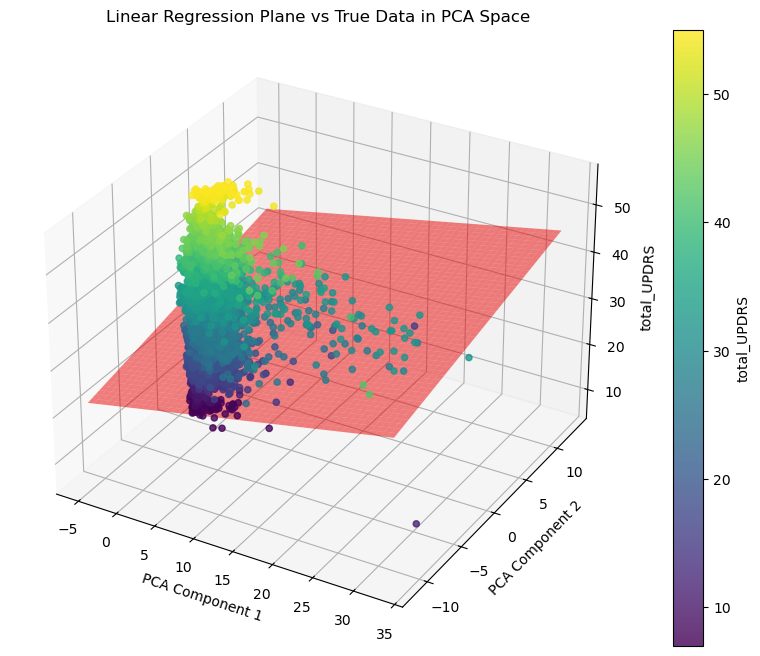

In [35]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Step 1: Apply PCA (same as before)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 2: Fit Linear Regression on PCA-reduced data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

# Step 3: Create meshgrid for surface plot
x_range = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 50)
y_range = np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 50)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
X_grid = np.c_[x_mesh.ravel(), y_mesh.ravel()]

# Step 4: Predict on grid to create surface
z_pred = lr_pca.predict(X_grid).reshape(x_mesh.shape)

# Step 5: Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# True data points
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train,
                     c=y_train, cmap='viridis', label='True Values', alpha=0.8)

# Regression surface
ax.plot_surface(x_mesh, y_mesh, z_pred, color='red', alpha=0.5, label='Regression Surface')

# Labels and colorbar
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('total_UPDRS')
ax.set_title('Linear Regression Plane vs True Data in PCA Space')
fig.colorbar(scatter, ax=ax, label='total_UPDRS')

plt.show()


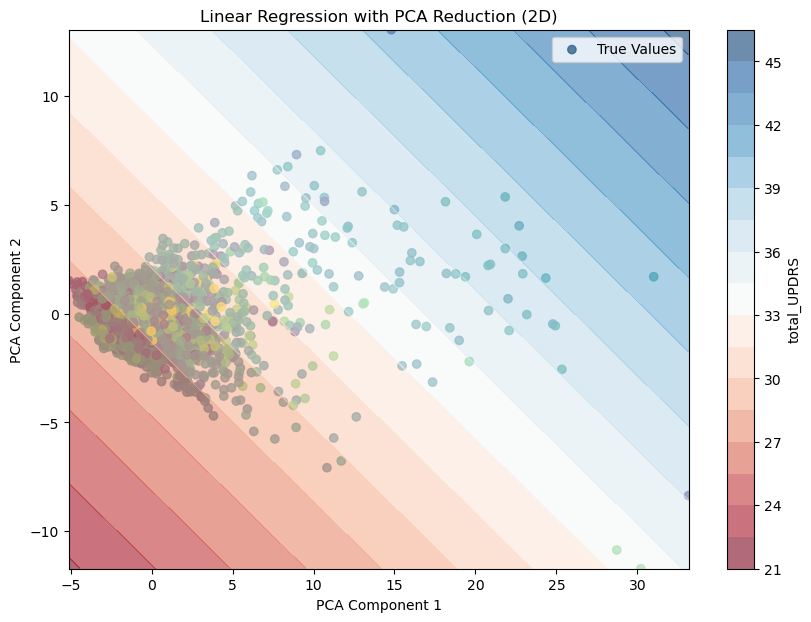

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression

# # Step 1: Apply PCA (same as before)
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_scaled)

# # Step 2: Fit Linear Regression on PCA-reduced data
# lr_pca = LinearRegression()
# lr_pca.fit(X_train_pca, y_train)

# # Step 3: Create meshgrid for contour plot
# x_range = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 50)
# y_range = np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 50)
# x_mesh, y_mesh = np.meshgrid(x_range, y_range)
# X_grid = np.c_[x_mesh.ravel(), y_mesh.ravel()]

# # Step 4: Predict on grid to create regression surface
# z_pred = lr_pca.predict(X_grid).reshape(x_mesh.shape)

# # Step 5: Plot the data and regression line in 2D
# plt.figure(figsize=(10, 7))

# # Scatter plot for true data points
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='True Values', alpha=0.8)

# # Contour plot for regression surface
# plt.contourf(x_mesh, y_mesh, z_pred, 20, cmap='RdBu', alpha=0.6)

# # Labels and title
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('Linear Regression with PCA Reduction (2D)')

# plt.colorbar(label='total_UPDRS')  # Color bar for the true values
# plt.legend()
# plt.show()


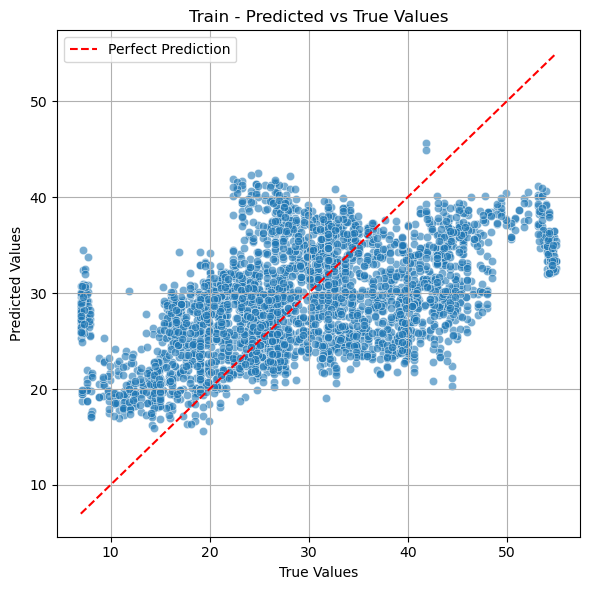

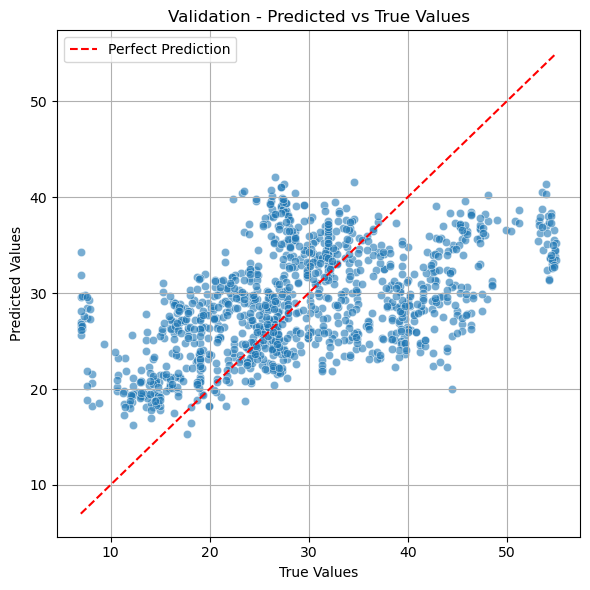

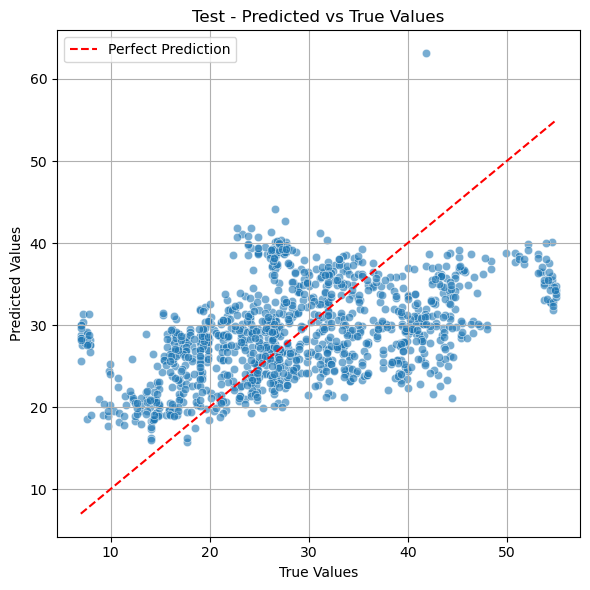

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions(y_true, y_pred, dataset_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{dataset_name} - Predicted vs True Values")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting for Train, Validation, and Test sets
plot_predictions(y_train, y_train_pred, "Train")
plot_predictions(y_val, y_val_pred, "Validation")
plot_predictions(y_test, y_test_pred, "Test")


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [29]:
# Predict on the validation and test sets
y_val_pred = dt_regressor.predict(X_val_scaled)
y_test_pred = dt_regressor.predict(X_test_scaled)


In [30]:
# Evaluate the model using Mean Squared Error and R^2
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R^2: {r2_val}")

print(f"Test MSE: {mse_test}")
print(f"Test R^2: {r2_test}")


Validation MSE: 0.22372271745531916
Validation R^2: 0.9980316110667304
Test MSE: 0.21482694262127655
Test R^2: 0.9980613568928062


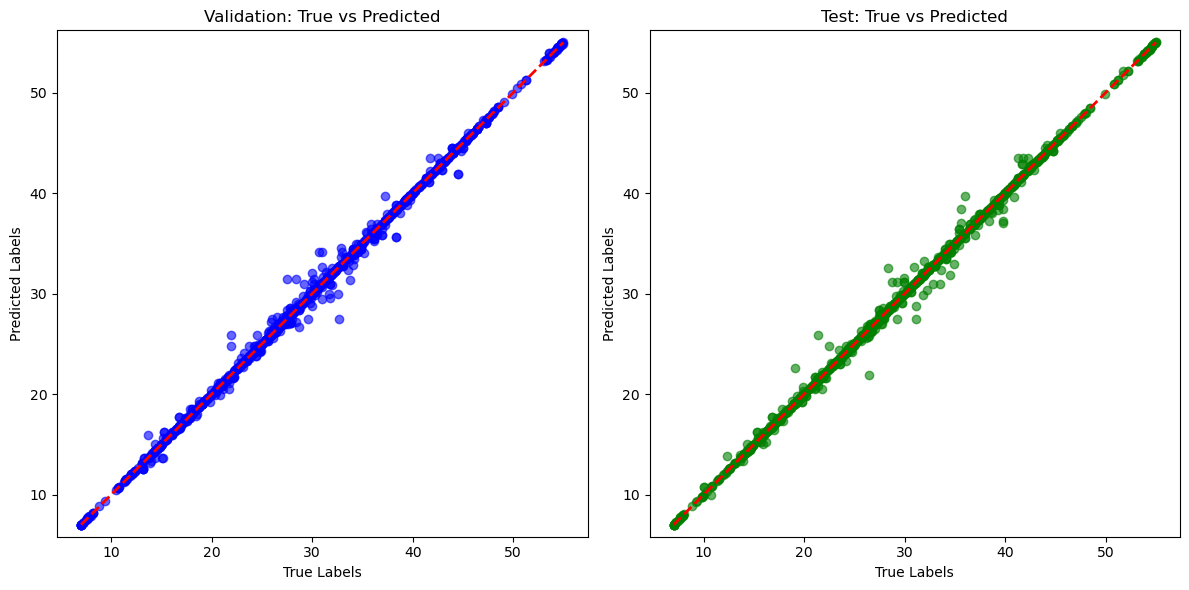

In [28]:
# Plotting for validation set
plt.figure(figsize=(12, 6))

# Scatter plot for validation data
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, color='blue', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Validation: True vs Predicted')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.axis('equal')

# Plotting for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Test: True vs Predicted')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()
